In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
import os
import matplotlib.pyplot as plt
plt.rc("font", family="Malgun Gothic")

In [5]:
#데이터 불러오기
mental_df = pd.read_csv("Mental Health Dataset.v2.csv")
mental_df.head()

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,8/27/2014 11:29,Female,United States,Corporate,No response,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
1,8/27/2014 11:31,Female,United States,Corporate,No response,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No
2,8/27/2014 11:32,Female,United States,Corporate,No response,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
3,8/27/2014 11:37,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
4,8/27/2014 11:43,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes


### 가설1: 정신 질환 치료 이력이 없는 응답자가 많은 국가일수록 정신 질환 치료 인프라 구축 정도가 낮을 것이다.

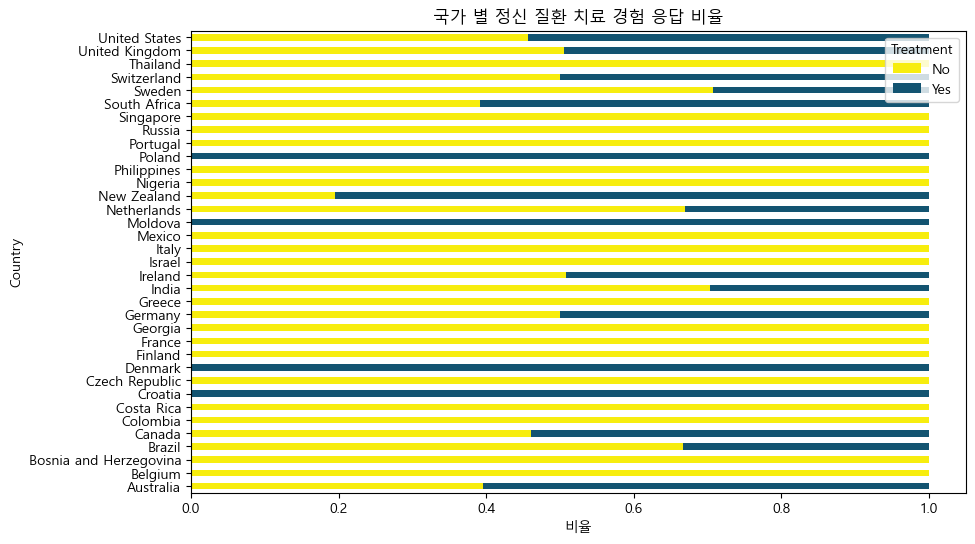

In [151]:
# 나라별 'Yes'와 'No' 답변 수 계산
treatment_counts = mental_df.groupby(['Country', 'treatment']).size().unstack(fill_value=0)

# 비율 계산
treatment_ratios = treatment_counts.div(treatment_counts.sum(axis=1), axis=0)

# 가로 누적 막대 그래프 그리기
treatment_ratios.plot(kind='barh', stacked=True, color=['#F7ED0E', '#135471'], figsize=(10, 6))

# 그래프 제목 및 레이블 설정
plt.title('국가 별 정신 질환 치료 경험 응답 비율')
plt.xlabel('비율')
plt.ylabel('Country')
plt.legend(title='Treatment', loc='upper right')

# 그래프 출력
plt.show()

yes가 100%: 폴란드, 몰도바, 덴마크, 크로아티아
no가 100%: 태국, 싱가포르, 러시아, 포르투갈, 필리핀, 나이지리아, 멕시코, 이탈리아, 이스라엘, 그리스, 조지아, 프랑스, 핀란드, 체코, 코스타리카, 콜롬비아, 보스니아 헤르체고비나, 벨기에

### (제외) 가설2: 정신 질환 치료 이력이 있는 사람들이 care_options에 대한 이해도가 더 높을 것이다.

In [153]:
# treatment와 care_options의 분포 확인
treatment_care_options = pd.crosstab(mental_df['treatment'], mental_df['care_options'])

print(treatment_care_options)

care_options     No  Not sure    Yes
treatment                           
No            70338     47158  27262
Yes           48548     30608  68450


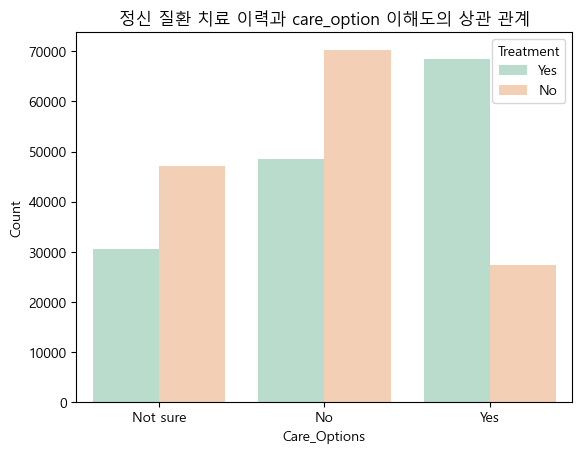

In [155]:
# 시각화
sns.countplot(x='care_options', hue='treatment', palette='Pastel2', data=mental_df)
plt.title('정신 질환 치료 이력과 care_option 이해도의 상관 관계')
plt.xlabel('Care_Options')
plt.ylabel('Count')
plt.legend(title='Treatment')
plt.show()

Chi-squared: 25215.104662912316
p-value: 0.0
Degrees of freedom: 2
Expected frequencies:
 [[58863.94900877 38504.22975469 47389.82123654]
 [60022.05099123 39261.77024531 48322.17876346]]


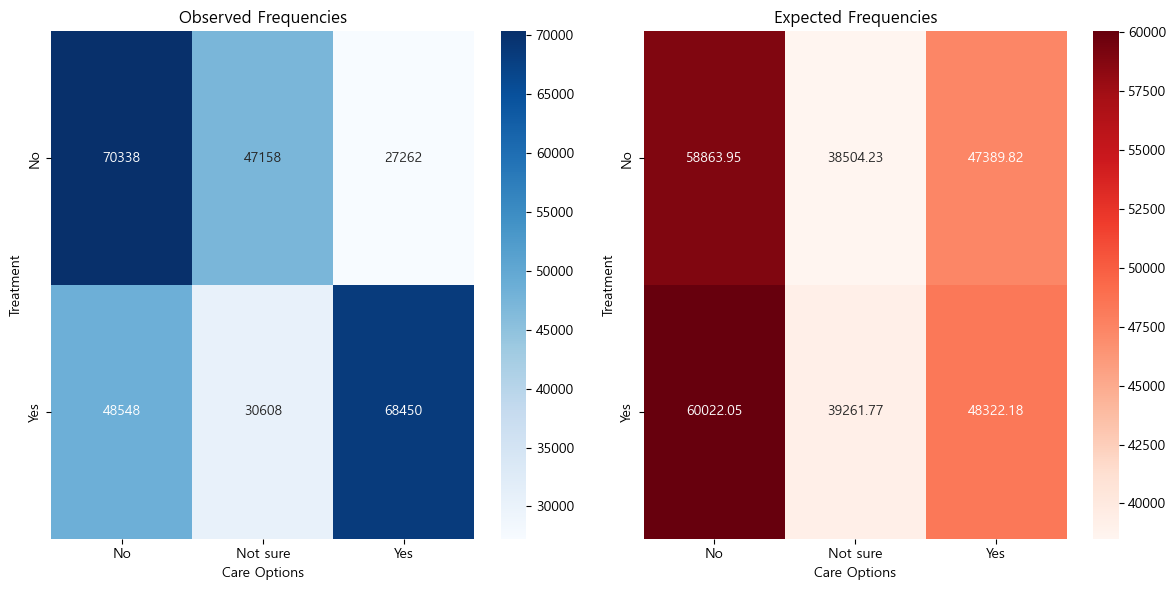

In [7]:
from scipy.stats import chi2_contingency

# 카이제곱 검정을 위한 교차 테이블 생성
contingency_table = pd.crosstab(mental_df['treatment'], mental_df['care_options'])

# 카이제곱 검정 수행
chi2, p, dof, expected = chi2_contingency(contingency_table)

# 결과 출력
print("Chi-squared:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:\n", expected)

# 관찰된 빈도 시각화
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='Blues')
plt.title('Observed Frequencies')
plt.xlabel('Care Options')
plt.ylabel('Treatment')

# 예상된 빈도 시각화
plt.subplot(1, 2, 2)
sns.heatmap(pd.DataFrame(expected, index=contingency_table.index, columns=contingency_table.columns), annot=True, fmt='.2f', cmap='Reds')
plt.title('Expected Frequencies')
plt.xlabel('Care Options')
plt.ylabel('Treatment')

plt.tight_layout()
plt.show()

### 가설3: 스트레스가 높은 사람은 감정 기복을 느끼는 정도가 높고 생활 습관 변화에 대한 의지가 낮을 것이다.

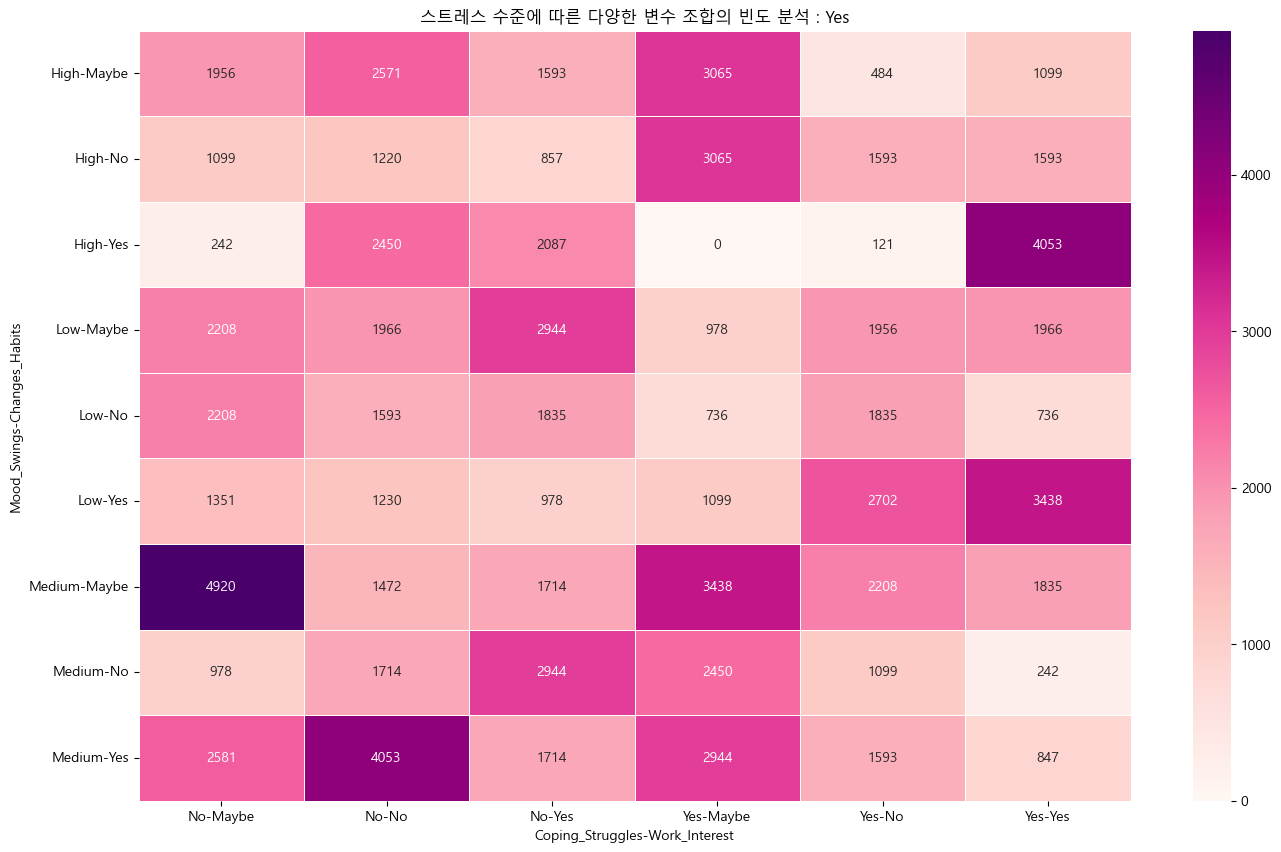

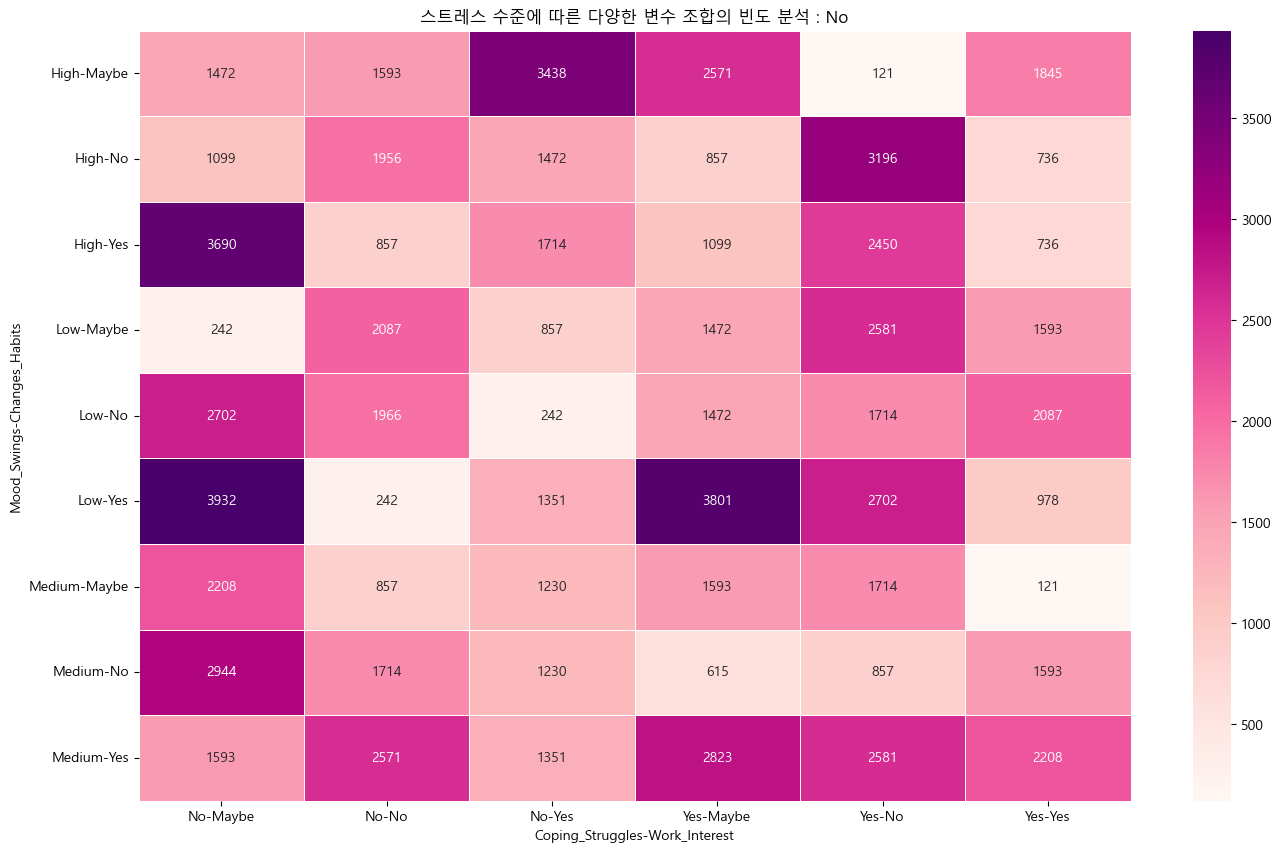

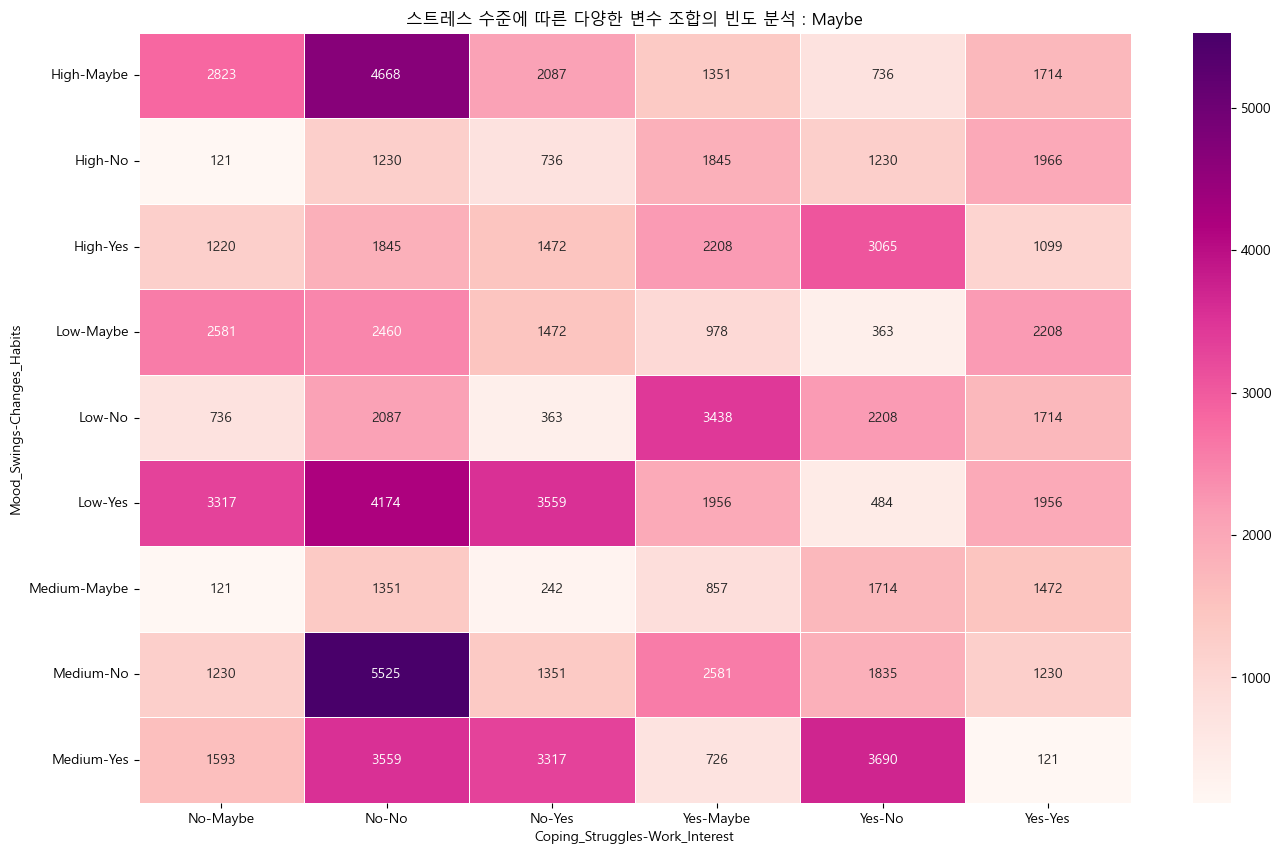

In [42]:
# 필요한 컬럼만 선택
columns_of_interest = ['Growing_Stress', 'Mood_Swings', 'Changes_Habits', 'Coping_Struggles', 'Work_Interest']
subset_df = mental_df[columns_of_interest]

# Growing_Stress 값 기준으로 데이터를 분리하여 빈도수 계산 및 시각화

# Define a function to calculate and plot frequencies for a given value of Growing_Stress
def plot_frequencies_for_stress_value(stress_value):
    subset = subset_df[subset_df['Growing_Stress'] == stress_value]
    freq_table = subset.groupby(['Mood_Swings', 'Changes_Habits', 'Coping_Struggles', 'Work_Interest']).size().reset_index(name='Frequency')
    
    plt.figure(figsize=(16, 10))
    crosstab = pd.crosstab(index=[subset['Mood_Swings'], subset['Changes_Habits']], 
                           columns=[subset['Coping_Struggles'], subset['Work_Interest']])
    sns.heatmap(crosstab, annot=True, fmt='.0f', linewidths=0.5, cmap='RdPu')
    plt.title(f'스트레스 수준에 따른 다양한 변수 조합의 빈도 분석 : {stress_value}')
    plt.show()

# Plot frequencies for each value of Growing_Stress
for stress_value in ['Yes', 'No', 'Maybe']:
    plot_frequencies_for_stress_value(stress_value)

### 가설4: 정신 치료 이력이 없는 사람중에 coping_struggles 에 어려움이 없는 사람일수록 mental_health_interview에서 정신 병력을 충분히 알릴 의향이 있을 것이다.

1. 정신 질환 치료 이력이 없고 스트레스 및 상황 대처에 어려움이 없는 경우

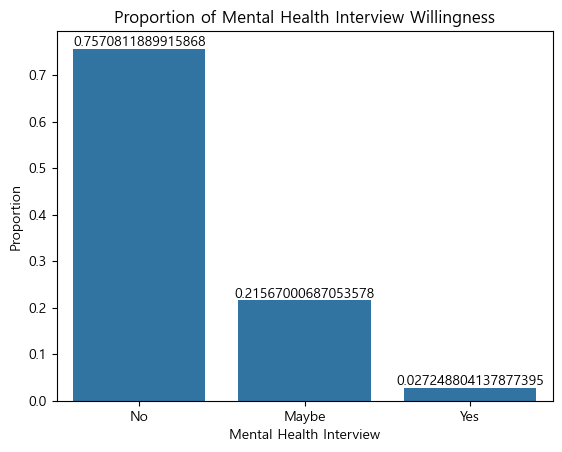

In [191]:
# 정신 치료 이력이 없는 사람 중 Coping_Struggles에 어려움이 없는 사람 필터링
filtered_df = mental_df[(mental_df['treatment'] == 'No') & (mental_df['Coping_Struggles'] == 'No')]
filtered_df

# mental_health_interview에 대한 응답 분포 확인
interview_counts = filtered_df['mental_health_interview'].value_counts(normalize=True).reset_index()
interview_counts.columns = ['mental_health_interview', 'proportion']

# 시각화
ax = sns.barplot(x='mental_health_interview', y='proportion', data=interview_counts)

for i in ax.patches:
    ax.text(i.get_x() + i.get_width() / 2, i.get_height(), str(i.get_height()), ha='center', va='bottom')

plt.title('Proportion of Mental Health Interview Willingness')
plt.xlabel('Mental Health Interview')
plt.ylabel('Proportion')
plt.show()

2. 정신 질환 치료 이력이 없고 스트레스 및 상황 대처에 어려움이 있는 경우

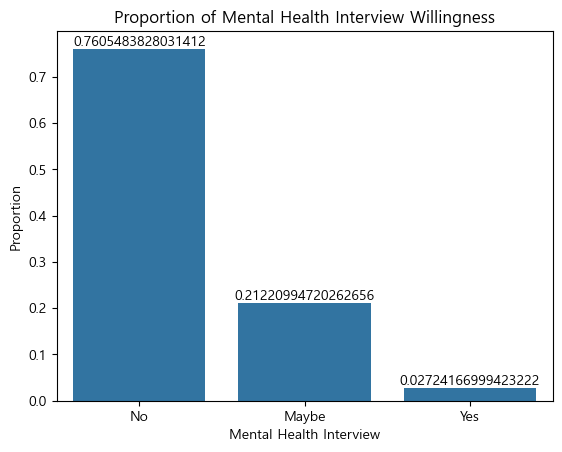

In [205]:
# 정신 치료 이력이 없는 사람 중 Coping_Struggles에 어려움이 있는 사람 필터링
filtered_df = mental_df[(mental_df['treatment'] == 'No') & (mental_df['Coping_Struggles'] == 'Yes')]
filtered_df

# mental_health_interview에 대한 응답 분포 확인
interview_counts = filtered_df['mental_health_interview'].value_counts(normalize=True).reset_index()
interview_counts.columns = ['mental_health_interview', 'proportion']

# 시각화
ax = sns.barplot(x='mental_health_interview', y='proportion', data=interview_counts)

for i in ax.patches:
    ax.text(i.get_x() + i.get_width() / 2, i.get_height(), str(i.get_height()), ha='center', va='bottom')

plt.title('Proportion of Mental Health Interview Willingness')
plt.xlabel('Mental Health Interview')
plt.ylabel('Proportion')
plt.show()

3. 정신 질환 치료 이력이 있고 스트레스 및 상황 대처에 어려움이 있는 경우

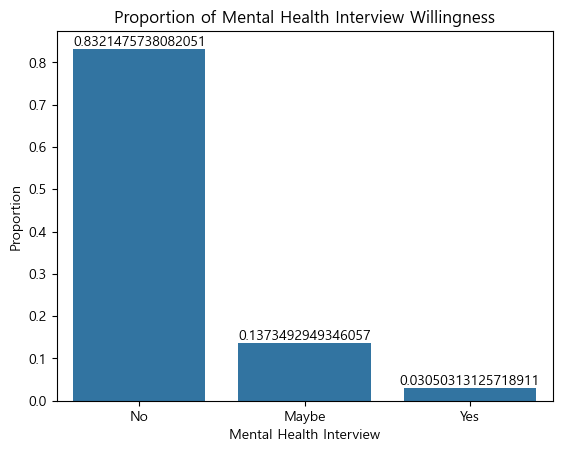

In [196]:
# 정신 치료 이력이 있는 사람 중 Coping_Struggles에 어려움이 있는 사람 필터링
filtered_df = mental_df[(mental_df['treatment'] == 'Yes') & (mental_df['Coping_Struggles'] == 'Yes')]
filtered_df

# mental_health_interview에 대한 응답 분포 확인
interview_counts = filtered_df['mental_health_interview'].value_counts(normalize=True).reset_index()
interview_counts.columns = ['mental_health_interview', 'proportion']

# 시각화
ax = sns.barplot(x='mental_health_interview', y='proportion', data=interview_counts)

for i in ax.patches:
    ax.text(i.get_x() + i.get_width() / 2, i.get_height(), str(i.get_height()), ha='center', va='bottom')

plt.title('Proportion of Mental Health Interview Willingness')
plt.xlabel('Mental Health Interview')
plt.ylabel('Proportion')
plt.show()

4. 정신 질환 치료 이력이 있고 스트레스 및 상황 대처에 어려움이 없는 경우

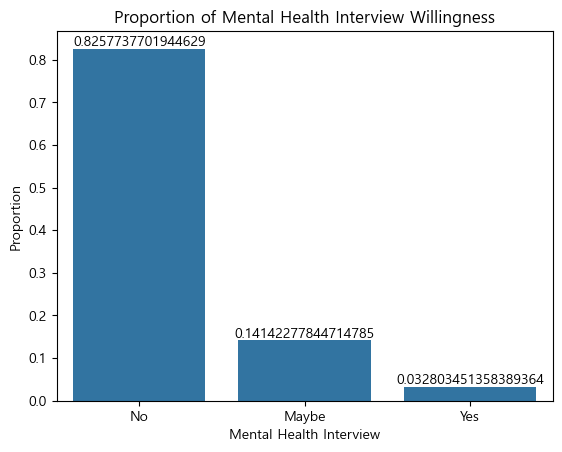

In [202]:
# 정신 치료 이력이 있는 사람 중 Coping_Struggles에 어려움이 없는 사람 필터링
filtered_df = mental_df[(mental_df['treatment'] == 'Yes') & (mental_df['Coping_Struggles'] == 'No')]
filtered_df

# mental_health_interview에 대한 응답 분포 확인
interview_counts = filtered_df['mental_health_interview'].value_counts(normalize=True).reset_index()
interview_counts.columns = ['mental_health_interview', 'proportion']

# 시각화
ax = sns.barplot(x='mental_health_interview', y='proportion', data=interview_counts)

for i in ax.patches:
    ax.text(i.get_x() + i.get_width() / 2, i.get_height(), str(i.get_height()), ha='center', va='bottom')

plt.title('Proportion of Mental Health Interview Willingness')
plt.xlabel('Mental Health Interview')
plt.ylabel('Proportion')
plt.show()

C:\Users\Minz\AppData\Local\Temp\ipykernel_12204\766223078.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='mental_health_interview', y='proportion', palette='Set3', data=interview_counts, ax=ax)
C:\Users\Minz\AppData\Local\Temp\ipykernel_12204\766223078.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='mental_health_interview', y='proportion', palette='Set3', data=interview_counts, ax=ax)
C:\Users\Minz\AppData\Local\Temp\ipykernel_12204\766223078.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='mental_health_interview', y='

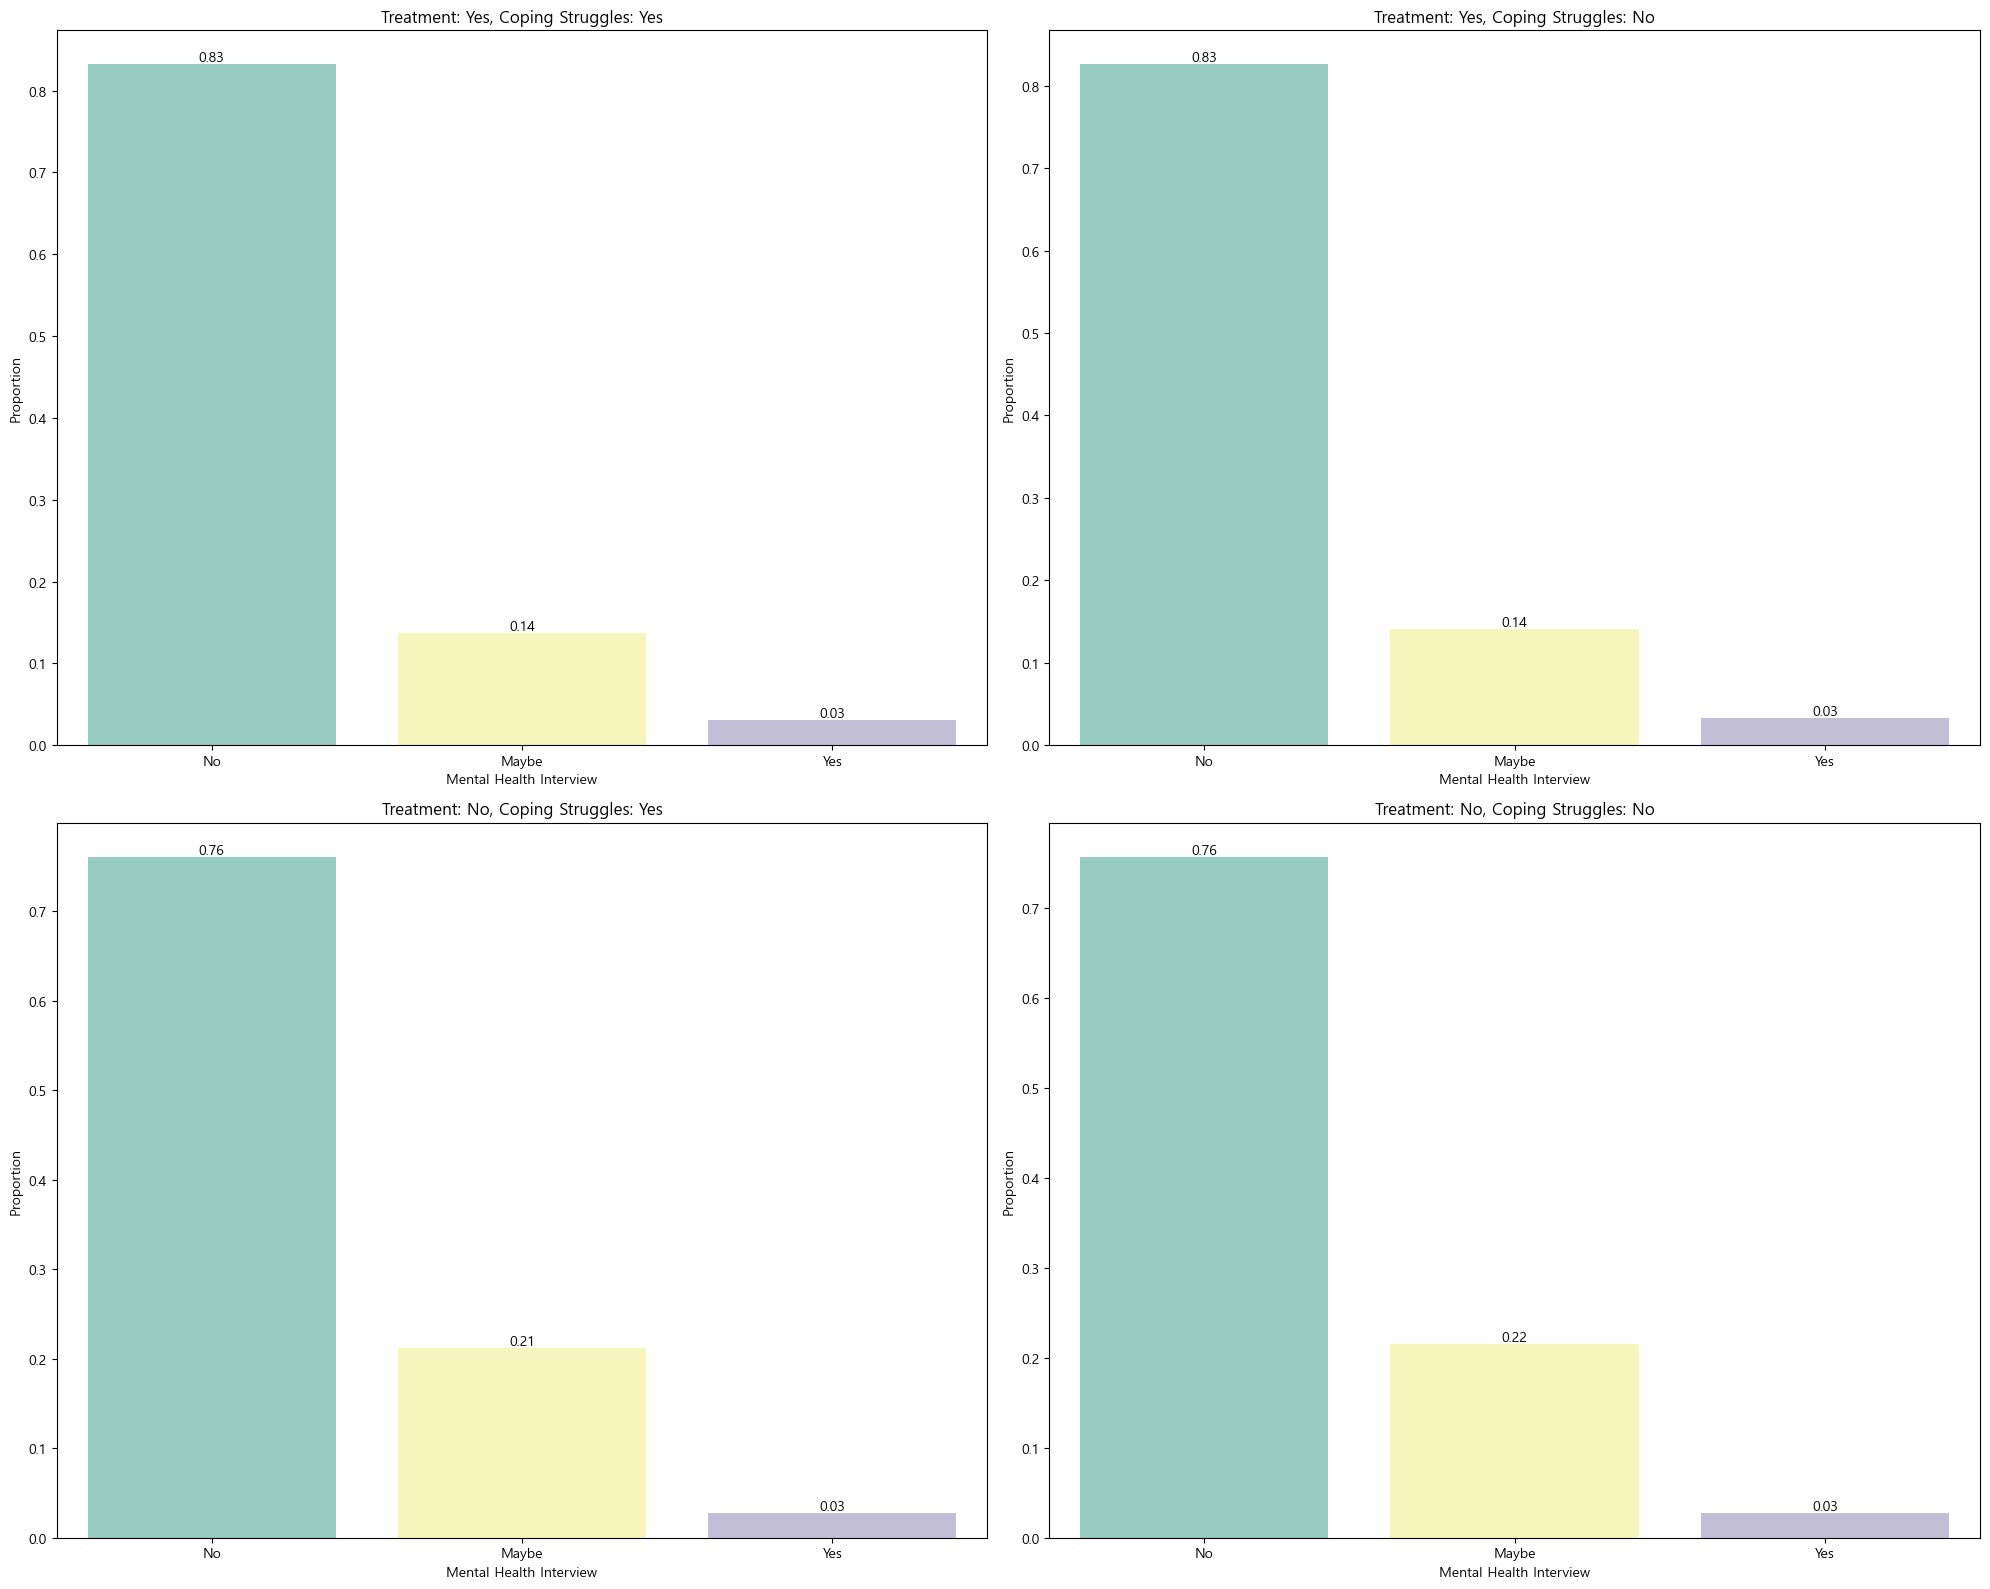

In [54]:
# Define a function to filter the data and plot the distribution
def plot_interview_distribution(treatment, coping_struggles, ax):
    filtered_df = mental_df[(mental_df['treatment'] == treatment) & (mental_df['Coping_Struggles'] == coping_struggles)]
    interview_counts = filtered_df['mental_health_interview'].value_counts(normalize=True).reset_index()
    interview_counts.columns = ['mental_health_interview', 'proportion']
    
    sns.barplot(x='mental_health_interview', y='proportion', palette='Set3', data=interview_counts, ax=ax)
    for i in ax.patches:
        ax.text(i.get_x() + i.get_width() / 2, i.get_height(), f"{i.get_height():.2f}", ha='center', va='bottom')
    ax.set_title(f'Treatment: {treatment}, Coping Struggles: {coping_struggles}')
    ax.set_xlabel('Mental Health Interview')
    ax.set_ylabel('Proportion')

# Plotting
fig, axs = plt.subplots(2, 2, figsize=(20, 16))

plot_interview_distribution('Yes', 'Yes', axs[0, 0])
plot_interview_distribution('Yes', 'No', axs[0, 1])
plot_interview_distribution('No', 'Yes', axs[1, 0])
plot_interview_distribution('No', 'No', axs[1, 1])

plt.tight_layout()
plt.show()